# Compare outcomes from differential analysis based on different imputation methods

- load scores based on `10_1_ald_diff_analysis`

In [1]:
import logging
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from IPython.display import display

import vaep
import vaep.databases.diseases

logger = vaep.logging.setup_nb_logger()

plt.rcParams['figure.figsize'] = (2, 2)
fontsize = 5
vaep.plotting.make_large_descriptors(fontsize)
logging.getLogger('fontTools').setLevel(logging.ERROR)

# catch passed parameters
args = None
args = dict(globals()).keys()

## Parameters
Default and set parameters for the notebook.

In [2]:
folder_experiment = 'runs/appl_ald_data/plasma/proteinGroups'

target = 'kleiner'
model_key = 'VAE'
baseline = 'RSN'
out_folder = 'diff_analysis'
selected_statistics = ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected']

disease_ontology = 5082  # code from https://disease-ontology.org/
# split diseases notebook? Query gene names for proteins in file from uniprot?
annotaitons_gene_col = 'PG.Genes'

In [3]:
# Parameters
disease_ontology = 10652
folder_experiment = "runs/alzheimer_study"
target = "AD"
baseline = "PI"
model_key = "VAE"
out_folder = "diff_analysis"
annotaitons_gene_col = "None"


Add set parameters to configuration

In [4]:
params = vaep.nb.get_params(args, globals=globals())
args = vaep.nb.Config()
args.folder_experiment = Path(params["folder_experiment"])
args = vaep.nb.add_default_paths(args,
                                 out_root=(
                                     args.folder_experiment
                                     / params["out_folder"]
                                     / params["target"]
                                     / f"{params['baseline']}_vs_{params['model_key']}"))
args.update_from_dict(params)
args.scores_folder = scores_folder = (args.folder_experiment
                                      / params["out_folder"]
                                      / params["target"]
                                      / 'scores')
args.freq_features_observed = args.folder_experiment / 'freq_features_observed.csv'
args

root - INFO     Removed from global namespace: folder_experiment


root - INFO     Removed from global namespace: target


root - INFO     Removed from global namespace: model_key


root - INFO     Removed from global namespace: baseline


root - INFO     Removed from global namespace: out_folder


root - INFO     Removed from global namespace: selected_statistics


root - INFO     Removed from global namespace: disease_ontology


root - INFO     Removed from global namespace: annotaitons_gene_col


root - INFO     Already set attribute: folder_experiment has value runs/alzheimer_study


root - INFO     Already set attribute: out_folder has value diff_analysis


{'annotaitons_gene_col': 'None',
 'baseline': 'PI',
 'data': PosixPath('runs/alzheimer_study/data'),
 'disease_ontology': 10652,
 'folder_experiment': PosixPath('runs/alzheimer_study'),
 'freq_features_observed': PosixPath('runs/alzheimer_study/freq_features_observed.csv'),
 'model_key': 'VAE',
 'out_figures': PosixPath('runs/alzheimer_study/figures'),
 'out_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE'),
 'out_metrics': PosixPath('runs/alzheimer_study'),
 'out_models': PosixPath('runs/alzheimer_study'),
 'out_preds': PosixPath('runs/alzheimer_study/preds'),
 'scores_folder': PosixPath('runs/alzheimer_study/diff_analysis/AD/scores'),
 'selected_statistics': ['p-unc', '-Log10 pvalue', 'qvalue', 'rejected'],
 'target': 'AD'}

### Excel file for exports

In [5]:
files_out = dict()
writer_args = dict(float_format='%.3f')

fname = args.out_folder / 'diff_analysis_compare_methods.xlsx'
files_out[fname.name] = fname
writer = pd.ExcelWriter(fname)
logger.info("Writing to excel file: %s", fname)

root - INFO     Writing to excel file: runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_compare_methods.xlsx


## Load scores

### Load baseline model scores
Show all statistics, later use selected statistics

In [6]:
fname = args.scores_folder / f'diff_analysis_scores_{args.baseline}.pkl'
scores_baseline = pd.read_pickle(fname)
scores_baseline

model                                      PI                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         0.591  1  0.868 0.353 0.005   
                             age        0.340  1  0.499 0.481 0.003   
                             Kiel       3.026  1  4.447 0.036 0.023   
                             Magdeburg  5.213  1  7.661 0.006 0.039   
                             Sweden     8.225  1 12.088 0.001 0.060   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         0.033  1  0.036 0.850 0.000   
                             age        1.206  1  1.304 0.255 0.007   
                             Kiel       0.011  1  0.012 0.914 0.000   
                             Magdeburg  2.104  1  2.275 0.133 0.012   
                             Sweden    10.551  1 11.410 0.001 0.056   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                0.453  0.514    False  
                             age               0.318  0.633    False  
                             Kiel              1.441  0.095    False  
                             Magdeburg         2.208  0.023     True  
                             Sweden            3.202  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                0.071  0.914    False  
                             age               0.594  0.412    False  
                             Kiel              0.039  0.953    False  
                             Magdeburg         0.876  0.259    False  
                             Sweden            3.053  0.005     True  

[7105 rows x 8 columns]

### Load selected comparison model scores

In [7]:
fname = args.scores_folder / f'diff_analysis_scores_{args.model_key}.pkl'
scores_model = pd.read_pickle(fname)
scores_model

model                                     VAE                        \
var                                        SS DF      F p-unc   np2   
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD         1.003  1  7.414 0.007 0.037   
                             age        0.006  1  0.042 0.838 0.000   
                             Kiel       0.250  1  1.844 0.176 0.010   
                             Magdeburg  0.444  1  3.280 0.072 0.017   
                             Sweden     1.620  1 11.975 0.001 0.059   
...                                       ... ..    ...   ...   ...   
S4R3U6                       AD         1.562  1  3.104 0.080 0.016   
                             age        0.347  1  0.690 0.407 0.004   
                             Kiel       2.084  1  4.140 0.043 0.021   
                             Magdeburg  2.223  1  4.416 0.037 0.023   
                             Sweden    17.450  1 34.672 0.000 0.154   

model                                                                 
var                                    -Log10 pvalue qvalue rejected  
protein groups               Source                                   
A0A024QZX5;A0A087X1N8;P35237 AD                2.151  0.020     True  
                             age               0.077  0.895    False  
                             Kiel              0.754  0.285    False  
                             Magdeburg         1.144  0.139    False  
                             Sweden            3.177  0.003     True  
...                                              ...    ...      ...  
S4R3U6                       AD                1.098  0.151    False  
                             age               0.390  0.537    False  
                             Kiel              1.364  0.091    False  
                             Magdeburg         1.433  0.080    False  
                             Sweden            7.762  0.000     True  

[7105 rows x 8 columns]

### Combined scores
show only selected statistics for comparsion

In [8]:
scores = scores_model.join(scores_baseline, how='outer')[[args.baseline, args.model_key]]
scores = scores.loc[:, pd.IndexSlice[scores.columns.levels[0].to_list(),
                                     args.selected_statistics]]
scores

model                                     PI                                \
var                                    p-unc -Log10 pvalue qvalue rejected   
protein groups               Source                                          
A0A024QZX5;A0A087X1N8;P35237 AD        0.353         0.453  0.514    False   
                             age       0.481         0.318  0.633    False   
                             Kiel      0.036         1.441  0.095    False   
                             Magdeburg 0.006         2.208  0.023     True   
                             Sweden    0.001         3.202  0.003     True   
...                                      ...           ...    ...      ...   
S4R3U6                       AD        0.850         0.071  0.914    False   
                             age       0.255         0.594  0.412    False   
                             Kiel      0.914         0.039  0.953    False   
                             Magdeburg 0.133         0.876  0.259    False   
                             Sweden    0.001         3.053  0.005     True   

model                                    VAE                                
var                                    p-unc -Log10 pvalue qvalue rejected  
protein groups               Source                                         
A0A024QZX5;A0A087X1N8;P35237 AD        0.007         2.151  0.020     True  
                             age       0.838         0.077  0.895    False  
                             Kiel      0.176         0.754  0.285    False  
                             Magdeburg 0.072         1.144  0.139    False  
                             Sweden    0.001         3.177  0.003     True  
...                                      ...           ...    ...      ...  
S4R3U6                       AD        0.080         1.098  0.151    False  
                             age       0.407         0.390  0.537    False  
                             Kiel      0.043         1.364  0.091    False  
                             Magdeburg 0.037         1.433  0.080    False  
                             Sweden    0.000         7.762  0.000     True  

[7105 rows x 8 columns]

Models in comparison (name mapping)

In [9]:
models = vaep.nb.Config.from_dict(
    vaep.pandas.index_to_dict(scores.columns.get_level_values(0)))
vars(models)

{'PI': 'PI', 'VAE': 'VAE'}

## Describe scores

In [10]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 7,105.000     7,105.000 7,105.000 7,105.000     7,105.000 7,105.000
mean      0.261         2.486     0.337     0.225         3.311     0.279
std       0.303         5.360     0.331     0.295         6.174     0.321
min       0.000         0.000     0.000     0.000         0.000     0.000
25%       0.004         0.334     0.014     0.000         0.408     0.002
50%       0.120         0.919     0.241     0.060         1.220     0.121
75%       0.463         2.449     0.617     0.391         3.369     0.521
max       1.000       145.358     1.000     0.999        84.177     0.999

### One to one comparison of by feature:

In [11]:
scores = scores.loc[pd.IndexSlice[:, args.target], :]
scores.to_excel(writer, 'scores', **writer_args)
scores

model                                                        PI                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.353         0.453   
A0A024R0T9;K7ER74;P02655                           AD     0.049         1.312   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.043         1.370   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.496         0.304   
A0A075B6H7                                         AD     0.114         0.945   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.013         1.871   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.082         1.084   
S4R3U6                                             AD     0.850         0.071   

model                                                                      \
var                                                       qvalue rejected   
protein groups                                     Source                   
A0A024QZX5;A0A087X1N8;P35237                       AD      0.514    False   
A0A024R0T9;K7ER74;P02655                           AD      0.119    False   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.107    False   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.646    False   
A0A075B6H7                                         AD      0.230    False   
...                                                          ...      ...   
Q9Y6R7                                             AD      0.315    False   
Q9Y6X5                                             AD      0.043     True   
Q9Y6Y8;Q9Y6Y8-2                                    AD      0.181    False   
Q9Y6Y9                                             AD      0.179    False   
S4R3U6                                             AD      0.914    False   

model                                                       VAE                \
var                                                       p-unc -Log10 pvalue   
protein groups                                     Source                       
A0A024QZX5;A0A087X1N8;P35237                       AD     0.007         2.151   
A0A024R0T9;K7ER74;P02655                           AD     0.030         1.521   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD     0.283         0.548   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD     0.256         0.592   
A0A075B6H7                                         AD     0.006         2.211   
...                                                         ...           ...   
Q9Y6R7                                             AD     0.175         0.756   
Q9Y6X5                                             AD     0.209         0.681   
Q9Y6Y8;Q9Y6Y8-2                                    AD     0.083         1.079   
Q9Y6Y9                                             AD     0.614         0.212   
S4R3U6                                             AD     0.080         1.098   

model                                                                      
var                                                       qvalue rejected  
protein groups                                     Source                  
A0A024QZX5;A0A087X1N8;P35237                       AD      0.020     True  
A0A024R0T9;K7ER74;P02655                           AD      0.068    False  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... AD      0.411    False  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            AD      0.380    False  
A0A075B6H7                                         AD      0.018     True  
...                                        

And the descriptive statistics
of the numeric values:

In [12]:
scores.describe()

model        PI                               VAE                        
var       p-unc -Log10 pvalue    qvalue     p-unc -Log10 pvalue    qvalue
count 1,421.000     1,421.000 1,421.000 1,421.000     1,421.000 1,421.000
mean      0.251         1.408     0.334     0.241         1.568     0.302
std       0.288         1.634     0.315     0.292         1.814     0.316
min       0.000         0.003     0.000     0.000         0.000     0.000
25%       0.011         0.364     0.038     0.007         0.364     0.020
50%       0.124         0.905     0.246     0.096         1.018     0.176
75%       0.432         1.943     0.591     0.433         2.151     0.564
max       0.994        22.344     0.996     0.999        21.333     0.999

and the boolean decision values

In [13]:
scores.describe(include=['bool', 'O'])

model,PI,VAE
var,rejected,rejected
count,1421,1421
unique,2,2
top,False,False
freq,1030,946


## Load frequencies of observed features

In [14]:
freq_feat = pd.read_csv(args.freq_features_observed, index_col=0)
freq_feat.columns = pd.MultiIndex.from_tuples([('data', 'frequency'),])
freq_feat

,data
,frequency
protein groups,
A0A024QZX5;A0A087X1N8;P35237,186
A0A024R0T9;K7ER74;P02655,195
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,174
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,196
A0A075B6H7,91
...,...
Q9Y6R7,197
Q9Y6X5,173


## Compare shared features

In [15]:
scores_common = (scores
                 .dropna()
                 .reset_index(-1, drop=True)
                 ).join(
    freq_feat, how='left'
)
scores_common

PI                       \
                                                   p-unc -Log10 pvalue qvalue   
protein groups                                                                  
A0A024QZX5;A0A087X1N8;P35237                       0.353         0.453  0.514   
A0A024R0T9;K7ER74;P02655                           0.049         1.312  0.119   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;... 0.043         1.370  0.107   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503            0.496         0.304  0.646   
A0A075B6H7                                         0.114         0.945  0.230   
...                                                  ...           ...    ...   
Q9Y6R7                                             0.175         0.756  0.315   
Q9Y6X5                                             0.013         1.871  0.043   
Q9Y6Y8;Q9Y6Y8-2                                    0.083         1.079  0.181   
Q9Y6Y9                                             0.082         1.084  0.179   
S4R3U6                                             0.850         0.071  0.914   

                                                              VAE  \
                                                   rejected p-unc   
protein groups                                                      
A0A024QZX5;A0A087X1N8;P35237                          False 0.007   
A0A024R0T9;K7ER74;P02655                              False 0.030   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False 0.283   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False 0.256   
A0A075B6H7                                            False 0.006   
...                                                     ...   ...   
Q9Y6R7                                                False 0.175   
Q9Y6X5                                                 True 0.209   
Q9Y6Y8;Q9Y6Y8-2                                       False 0.083   
Q9Y6Y9                                                False 0.614   
S4R3U6                                                False 0.080   

                                                                         \
                                                   -Log10 pvalue qvalue   
protein groups                                                            
A0A024QZX5;A0A087X1N8;P35237                               2.151  0.020   
A0A024R0T9;K7ER74;P02655                                   1.521  0.068   
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...         0.548  0.411   
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503                    0.592  0.380   
A0A075B6H7                                                 2.211  0.018   
...                                                          ...    ...   
Q9Y6R7                                                     0.756  0.284   
Q9Y6X5                                                     0.681  0.326   
Q9Y6Y8;Q9Y6Y8-2                                            1.079  0.157   
Q9Y6Y9                                                     0.212  0.725   
S4R3U6                                                     1.098  0.151   

                                                                 data  
                                                   rejected frequency  
protein groups                                                         
A0A024QZX5;A0A087X1N8;P35237                           True       186  
A0A024R0T9;K7ER74;P02655                              False       195  
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;...    False       174  
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503               False       196  
A0A075B6H7                                             True        91  
...                                                     ...       ...  
Q9Y6R7                                                False       197  
Q9Y6X5                                                False       173  
Q9Y6Y8;Q9Y6Y8-2                                       False       197  
Q9Y6Y9                               

### Annotate decisions in Confusion Table style:

In [16]:
def annotate_decision(scores, model, model_column):
    return scores[(model_column, 'rejected')].replace({False: f'{model} (no) ', True: f'{model} (yes)'})


annotations = None
for model, model_column in models.items():
    if annotations is not None:
        annotations += ' - '
        annotations += annotate_decision(scores_common,
                                         model=model, model_column=model_column)
    else:
        annotations = annotate_decision(
            scores_common, model=model, model_column=model_column)
annotations.name = 'Differential Analysis Comparison'
annotations.value_counts()

Differential Analysis Comparison
PI (no)  - VAE (no)    883
PI (yes) - VAE (yes)   328
PI (no)  - VAE (yes)   147
PI (yes) - VAE (no)     63
Name: count, dtype: int64

### List different decisions between models

In [17]:
mask_different = (
    (scores_common.loc[:, pd.IndexSlice[:, 'rejected']].any(axis=1))
    & ~(scores_common.loc[:, pd.IndexSlice[:, 'rejected']].all(axis=1))
)
_to_write = scores_common.loc[mask_different]
_to_write.to_excel(writer, 'differences', **writer_args)
logger.info("Writen to Excel file under sheet 'differences'.")
_to_write

root - INFO     Writen to Excel file under sheet 'differences'.


PI                                 VAE  \
                             p-unc -Log10 pvalue qvalue rejected p-unc   
protein groups                                                           
A0A024QZX5;A0A087X1N8;P35237 0.353         0.453  0.514    False 0.007   
A0A075B6H7                   0.114         0.945  0.230    False 0.006   
A0A075B6I0                   0.024         1.617  0.069    False 0.001   
A0A075B6J9                   0.036         1.439  0.095    False 0.016   
A0A075B6Q5                   0.596         0.225  0.729    False 0.005   
...                            ...           ...    ...      ...   ...   
Q9UNW1                       0.009         2.056  0.031     True 0.923   
Q9UP79                       0.208         0.683  0.357    False 0.000   
Q9UQ52                       0.092         1.038  0.195    False 0.001   
Q9Y6C2                       0.909         0.041  0.951    False 0.003   
Q9Y6X5                       0.013         1.871  0.043     True 0.209   

                                                                data  
                             -Log10 pvalue qvalue rejected frequency  
protein groups                                                        
A0A024QZX5;A0A087X1N8;P35237         2.151  0.020     True       186  
A0A075B6H7                           2.211  0.018     True        91  
A0A075B6I0                           3.190  0.002     True       194  
A0A075B6J9                           1.809  0.039     True       156  
A0A075B6Q5                           2.313  0.014     True       104  
...                                    ...    ...      ...       ...  
Q9UNW1                               0.035  0.951    False       171  
Q9UP79                               4.443  0.000     True       135  
Q9UQ52                               3.175  0.003     True       188  
Q9Y6C2                               2.515  0.010     True       119  
Q9Y6X5                               0.681  0.326    False       173  

[210 rows x 9 columns]

## Plot qvalues of both models with annotated decisions

Prepare data for plotting (qvalues)

In [18]:
var = 'qvalue'
to_plot = [scores_common[v][var] for v in models.values()]
for s, k in zip(to_plot, models.keys()):
    s.name = k.replace('_', ' ')
to_plot.append(scores_common['data'])
to_plot.append(annotations)
to_plot = pd.concat(to_plot, axis=1)
to_plot

,PI,VAE,frequency,Differential Analysis Comparison
protein groups,,,,
A0A024QZX5;A0A087X1N8;P35237,0.514,0.020,186,PI (no) - VAE (yes)
A0A024R0T9;K7ER74;P02655,0.119,0.068,195,PI (no) - VAE (no)
A0A024R3W6;A0A024R412;O60462;O60462-2;O60462-3;O60462-4;O60462-5;Q7LBX6;X5D2Q8,0.107,0.411,174,PI (no) - VAE (no)
A0A024R644;A0A0A0MRU5;A0A1B0GWI2;O75503,0.646,0.380,196,PI (no) - VAE (no)
A0A075B6H7,0.230,0.018,91,PI (no) - VAE (yes)
...,...,...,...,...
Q9Y6R7,0.315,0.284,197,PI (no) - VAE (no)
Q9Y6X5,0.043,0.326,173,PI (yes) - VAE (no)
Q9Y6Y8;Q9Y6Y8-2,0.181,0.157,197,PI (no) - VAE (no)


List of features with the highest difference in qvalues

In [19]:
# should it be possible to run not only RSN?
to_plot['diff_qvalue'] = (to_plot[str(args.baseline)] - to_plot[str(args.model_key)]).abs()
to_plot.loc[mask_different].sort_values('diff_qvalue', ascending=False)

,PI,VAE,frequency,Differential Analysis Comparison,diff_qvalue
protein groups,,,,,
A0A087X1Z2;C9JTV4;H0Y4Y4;Q8WYH2;Q96C19;Q9BUP0;Q9BUP0-2,0.001,0.984,66,PI (yes) - VAE (no),0.984
O94898,0.965,0.003,60,PI (no) - VAE (yes),0.962
D6RF35,0.988,0.028,57,PI (no) - VAE (yes),0.959
Q15223;Q15223-2;Q15223-3,0.050,0.997,183,PI (yes) - VAE (no),0.948
A0A0C4DH31,0.963,0.016,52,PI (no) - VAE (yes),0.947
...,...,...,...,...,...
Q9NX62,0.055,0.045,197,PI (no) - VAE (yes),0.011
P00740;P00740-2,0.053,0.043,197,PI (no) - VAE (yes),0.010
K7ERG9;P00746,0.052,0.042,197,PI (no) - VAE (yes),0.010


### Differences plotted with created annotations

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_1_VAE


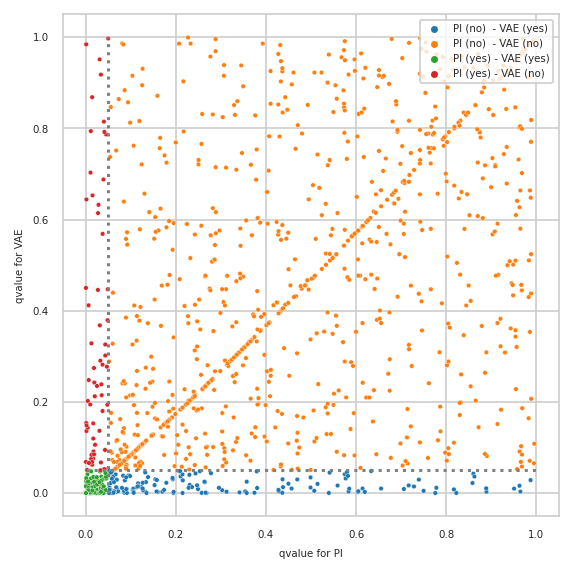

In [20]:
figsize = (4, 4)
size = 5
fig, ax = plt.subplots(figsize=figsize)
x_col = to_plot.columns[0]
y_col = to_plot.columns[1]
ax = sns.scatterplot(data=to_plot,
                     x=x_col,
                     y=y_col,
                     s=size,
                     hue='Differential Analysis Comparison',
                     ax=ax)
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.4,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_1_{args.model_key}'] = (
    args.out_folder /
    f'diff_analysis_comparision_1_{args.model_key}')
fname = files_out[f'diff_analysis_comparision_1_{args.model_key}']
vaep.savefig(fig, name=fname)

- also showing how many features were measured ("observed") by size of circle

vaep.plotting - INFO     Saved Figures to runs/alzheimer_study/diff_analysis/AD/PI_vs_VAE/diff_analysis_comparision_2_VAE


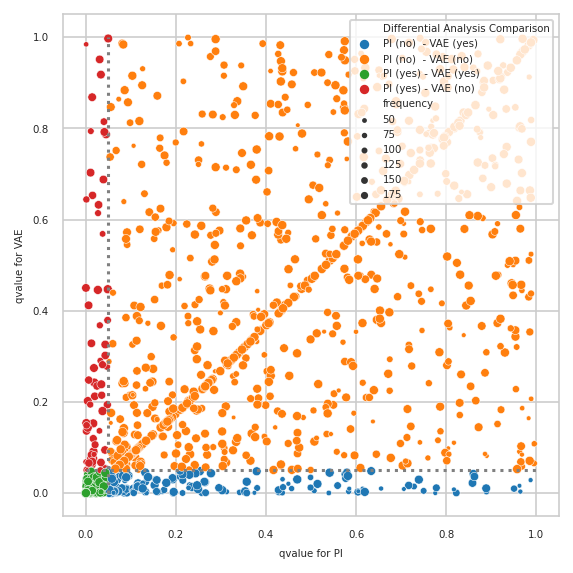

In [21]:
fig, ax = plt.subplots(figsize=figsize)
ax = sns.scatterplot(data=to_plot,
                     x=to_plot.columns[0],
                     y=to_plot.columns[1],
                     size='frequency',
                     s=size,
                     sizes=(5, 20),
                     hue='Differential Analysis Comparison')
_ = ax.legend(fontsize=fontsize,
              title_fontsize=fontsize,
              markerscale=0.6,
              title='',
              )
ax.set_xlabel(f"qvalue for {x_col}")
ax.set_ylabel(f"qvalue for {y_col}")
ax.hlines(0.05, 0, 1, color='grey', linestyles='dotted')
ax.vlines(0.05, 0, 1, color='grey', linestyles='dotted')
sns.move_legend(ax, "upper right")
files_out[f'diff_analysis_comparision_2_{args.model_key}'] = (
    args.out_folder / f'diff_analysis_comparision_2_{args.model_key}')
vaep.savefig(
    fig, name=files_out[f'diff_analysis_comparision_2_{args.model_key}'])

## Only features contained in model
- this block exist due to a specific part in the ALD analysis of the paper

In [22]:
scores_model_only = scores.reset_index(level=-1, drop=True)
_diff = scores_model_only.index.difference(scores_common.index)
if not _diff.empty:
    scores_model_only = (scores_model_only
                         .loc[
                             _diff,
                             args.model_key]
                         .sort_values(by='qvalue', ascending=True)
                         .join(freq_feat.squeeze().rename(freq_feat.columns.droplevel()[0])
                               )
                         )
    display(scores_model_only)
else:
    scores_model_only = None
    logger.info("No features only in new comparision model.")

if not _diff.empty:
    scores_model_only.to_excel(writer, 'only_model', **writer_args)
    display(scores_model_only.rejected.value_counts())
    scores_model_only_rejected = scores_model_only.loc[scores_model_only.rejected]
    scores_model_only_rejected.to_excel(
        writer, 'only_model_rejected', **writer_args)

root - INFO     No features only in new comparision model.


## DISEASES DB lookup

Query diseases database for gene associations with specified disease ontology id.

In [23]:
data = vaep.databases.diseases.get_disease_association(
    doid=args.disease_ontology, limit=10000)
data = pd.DataFrame.from_dict(data, orient='index').rename_axis('ENSP', axis=0)
data = data.rename(columns={'name': args.annotaitons_gene_col}).reset_index(
).set_index(args.annotaitons_gene_col)
data

vaep.databases.diseases - WARNING  There are more associations available


,ENSP,score
None,,
PSEN2,ENSP00000355747,5.000
PSEN1,ENSP00000326366,5.000
APOE,ENSP00000252486,5.000
APP,ENSP00000284981,5.000
MAPT,ENSP00000340820,4.800
...,...,...
ZBTB22,ENSP00000407545,0.683
HMGN2,ENSP00000355228,0.683
PPP1R13B,ENSP00000202556,0.683


## Shared features
ToDo: new script -> DISEASES DB lookup

In [24]:
feat_name = scores.index.names[0]  # first index level is feature name
if args.annotaitons_gene_col in scores.index.names:
    logger.info(f"Found gene annotation in scores index:  {scores.index.names}")
else:
    logger.info(f"No gene annotation in scores index:  {scores.index.names}"
                " Exiting.")
    import sys
    sys.exit(0)

root - INFO     No gene annotation in scores index:  ['protein groups', 'Source'] Exiting.


SystemExit: 0

In [ ]:
gene_to_PG = (scores.droplevel(
    list(set(scores.index.names) - {feat_name, args.annotaitons_gene_col})
)
    .index
    .to_frame()
    .reset_index(drop=True)
    .set_index(args.annotaitons_gene_col)
)
gene_to_PG.head()

In [ ]:
disease_associations_all = data.join(
    gene_to_PG).dropna().reset_index().set_index(feat_name).join(annotations)
disease_associations_all

## only by model

In [ ]:
idx = disease_associations_all.index.intersection(scores_model_only.index)
disease_assocications_new = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new.head(20)

In [ ]:
mask = disease_assocications_new.loc[idx, 'score'] >= 2.0
disease_assocications_new.loc[idx].loc[mask]

## Only by model which were significant

In [ ]:
idx = disease_associations_all.index.intersection(
    scores_model_only_rejected.index)
disease_assocications_new_rejected = disease_associations_all.loc[idx].sort_values(
    'score', ascending=False)
disease_assocications_new_rejected.head(20)

In [ ]:
mask = disease_assocications_new_rejected.loc[idx, 'score'] >= 2.0
disease_assocications_new_rejected.loc[idx].loc[mask]

## Shared which are only significant for by model

In [ ]:
mask = (scores_common[(str(args.model_key), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_model = (disease_associations_all.loc[idx].sort_values(
    'score', ascending=False))
disease_assocications_shared_rejected_by_model.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_model.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_model.loc[idx].loc[mask]

## Only significant by RSN

In [ ]:
mask = (scores_common[(str(args.baseline), 'rejected')] & mask_different)
mask.sum()

In [ ]:
idx = disease_associations_all.index.intersection(mask.index[mask])
disease_assocications_shared_rejected_by_RSN = (
    disease_associations_all
    .loc[idx]
    .sort_values('score', ascending=False))
disease_assocications_shared_rejected_by_RSN.head(20)

In [ ]:
mask = disease_assocications_shared_rejected_by_RSN.loc[idx, 'score'] >= 2.0
disease_assocications_shared_rejected_by_RSN.loc[idx].loc[mask]

## Write to excel

In [ ]:
disease_associations_all.to_excel(
    writer, sheet_name='disease_assoc_all', **writer_args)
disease_assocications_new.to_excel(
    writer, sheet_name='disease_assoc_new', **writer_args)
disease_assocications_new_rejected.to_excel(
    writer, sheet_name='disease_assoc_new_rejected', **writer_args)

## Outputs

In [ ]:
writer.close()
files_out